<a href="https://colab.research.google.com/github/BibikaShrestha/AI_Assignment_BibikaShrestha_2462335/blob/main/2462335_BibikaShrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#Load the dataset
df=pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv",encoding='latin1',index_col=0)


#Problem 1A: Single-Year HDI Exploration


In [43]:
# Task 1: Extract Latest Year

#Identify unique years in the dataset
unique_years= (df['year'].unique())
print(f"Unique years in the dataset: {unique_years}")

#Filter the dataset to include only observations from the year 2022
hdi_2022_df = df[df['year'] == 2022].copy()




Unique years in the dataset: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [44]:
# Task 2: Data Exploration

# Display the first 10 rows of the 2022 dataset
print("First 10 rows of hdi_2022_df:")
print(hdi_2022_df.head(10))

# Count the number of rows and columns
print(f"\nDataset shape: {hdi_2022_df.shape}")
print(f"Rows: {hdi_2022_df.shape[0]}, Columns: {hdi_2022_df.shape[1]}")

# List all column names and their data types
print("\nColumn names and data types:")
hdi_2022_df.info()

First 10 rows of hdi_2022_df:
    iso3              country  year    hdi  life_expectancy  pop_millions  \
33   AFG          Afghanistan  2022  0.462           62.879     41.128771   
66   ALB              Albania  2022  0.789           76.833      2.842321   
99   DZA              Algeria  2022  0.745           77.129     44.903225   
132  AND              Andorra  2022  0.884           83.552      0.079824   
165  AGO               Angola  2022  0.591           61.929     35.588987   
198  ATG  Antigua and Barbuda  2022  0.826           79.236      0.093763   
231  ARG            Argentina  2022  0.849           76.064     45.510318   
264  ARM              Armenia  2022  0.786           73.372      2.780469   
297  AUS            Australia  2022  0.946           83.579     26.177414   
330  AUT              Austria  2022  0.926           82.412      8.939617   

        hdi_f     hdi_m  life_expec_f  life_expec_m  ...  gender_development  \
33   0.332443  0.534145        66.213     

In [45]:
# Task 3: Missing Values & Data Cleaning

# Check missing values in each column
missing_counts = hdi_2022_df.isnull().sum()
print("Missing values per column:")
print(missing_counts)
print("Total missing values:", missing_counts.sum())

# Check data types (numeric columns stored as text)
print("\nData types:")
print(hdi_2022_df.dtypes)

# Check for inconsistent country names
print("\nCountry names:")
print(hdi_2022_df['country'].unique())

# Check duplicate rows
print("\nDuplicate rows found:", hdi_2022_df.duplicated().sum())

# Replace special character used for missing data
hdi_2022_df.replace("–", pd.NA, inplace=True)

# Convert numeric columns stored as text
hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')
hdi_2022_df['gross_inc_percap'] = pd.to_numeric(hdi_2022_df['gross_inc_percap'], errors='coerce')

# Remove duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)

# Drop rows with missing key indicators
hdi_2022_df.dropna(subset=['hdi', 'gross_inc_percap'], inplace=True)

Missing values per column:
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64
Total missing values: 212

Data 

In [46]:
# Impute missing numeric values with the median
numeric_cols = hdi_2022_df.select_dtypes(include='float64').columns
for col in numeric_cols:
    hdi_2022_df[col] = hdi_2022_df[col].fillna(hdi_2022_df[col].median())
hdi_2022_df.isna().sum()

,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,0
hdi_m,0
life_expec_f,0
life_expec_m,0


In [47]:
# Task 4: Basic Statistics

# Mean, median and standard deviation of HDI
mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

print("Mean HDI (2022):", round(mean_hdi, 3))
print("Median HDI (2022):", round(median_hdi, 3))
print("Standard Deviation of HDI (2022):", round(std_hdi, 3))

# Country with highest HDI
highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), 'country']
highest_hdi_value = hdi_2022_df['hdi'].max()

print("\nCountry with highest HDI (2022):", highest_hdi_country)
print("Highest HDI value:", highest_hdi_value)

# Country with lowest HDI
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), 'country']
lowest_hdi_value = hdi_2022_df['hdi'].min()


print("\nCountry with lowest HDI (2022):", lowest_hdi_country)
print("Lowest HDI value:", lowest_hdi_value)

Mean HDI (2022): 0.723
Median HDI (2022): 0.74
Standard Deviation of HDI (2022): 0.153

Country with highest HDI (2022): Switzerland
Highest HDI value: 0.967

Country with lowest HDI (2022): Somalia
Lowest HDI value: 0.38


In [48]:
# Task 5: Filtering and Sorting

# Filter countries with HDI greater than 0.800
high_hdi_countries = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]

# Sort by Gross National Income per Capita in descending order
high_hdi_countries_sorted = high_hdi_countries.sort_values(
    by='gross_inc_percap', ascending=False
)

# Display the top 10 countries
print("Top 10 countries with HDI > 0.800 sorted by GNI per capita (descending):")
print(high_hdi_countries_sorted[['country', 'hdi', 'gross_inc_percap']].head(10))


Top 10 countries with HDI > 0.800 sorted by GNI per capita (descending):
                     country    hdi  gross_inc_percap
3333           Liechtenstein  0.942      146673.24150
4719                   Qatar  0.875       95944.37754
5214               Singapore  0.949       88761.14559
2706                 Ireland  0.950       87467.51391
3399              Luxembourg  0.927       78554.23640
6105    United Arab Emirates  0.937       74103.71494
5610             Switzerland  0.967       69432.78669
4323                  Norway  0.966       69189.76165
6171           United States  0.927       65564.93798
2475  Hong Kong, China (SAR)  0.956       62485.50516


In [49]:
# Task 6: Adding HDI Category Column

# Function to classify HDI
def classify_hdi(hdi_value):
    if hdi_value < 0.550:
        return 'Low'
    elif 0.550 <= hdi_value <= 0.699:
        return 'Medium'
    elif 0.700 <= hdi_value <= 0.799:
        return 'High'
    else:  # 0.800 and above
        return 'Very high'

# Apply the function to create a new column
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

# Verify that all countries are classified
print(hdi_2022_df[['country', 'hdi', 'HDI Category']].head(10))

# Optional: check value counts to ensure categories make sense
print("\nHDI Category distribution:")
print(hdi_2022_df['HDI Category'].value_counts())

# Save the final dataframe to CSV
hdi_2022_df.to_csv('/content/drive/MyDrive/Dataset-AI/HDI_category_added.csv', index=False)
print("\nFinal dataframe saved as 'HDI_category_added.csv'")



                 country    hdi HDI Category
33           Afghanistan  0.462          Low
66               Albania  0.789         High
99               Algeria  0.745         High
132              Andorra  0.884    Very high
165               Angola  0.591       Medium
198  Antigua and Barbuda  0.826    Very high
231            Argentina  0.849    Very high
264              Armenia  0.786         High
297            Australia  0.946    Very high
330              Austria  0.926    Very high

HDI Category distribution:
HDI Category
Very high    71
High         54
Medium       44
Low          35
Name: count, dtype: int64

Final dataframe saved as 'HDI_category_added.csv'


# Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

In [50]:
# Task 1: Data Extraction and Saving (2020–2022)

# Filter dataset for years 2020, 2021, and 2022
hdi_2020_2022_df = df[df['year'].isin([2020, 2021, 2022])].copy()

# Verify only target years are included
print("Years in filtered dataset:", hdi_2020_2022_df['year'].unique())
print("Rows × Columns:", hdi_2020_2022_df.shape)

# Save the filtered dataset with specified path
hdi_2020_2022_df.to_csv('/content/drive/MyDrive/Dataset-AI/HDI_problem1B.csv',index=False)

print("Saved as 'HDI_problem1B.csv' in Dataset-AI folder")


Years in filtered dataset: [2020 2021 2022]
Rows × Columns: (618, 29)
Saved as 'HDI_problem1B.csv' in Dataset-AI folder


In [51]:
# Task 2: Data Cleaning

# Check for missing values in the essential columns (hdi, country, year)
print("Missing values in essential columns:")
missing_counts = hdi_2020_2022_df[['hdi', 'country', 'year']].isna().sum()
print(missing_counts)

# Identify and address missing or null values
# Drop rows where HDI is missing (HDI is the key indicator)
rows_before = len(hdi_2020_2022_df)
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=['hdi'])
rows_after = len(hdi_2020_2022_df)
print(f"\nDropped {rows_before - rows_after} rows with missing HDI values")

# Identify and remove duplicate rows
duplicate_count = hdi_2020_2022_df.duplicated().sum()
if duplicate_count > 0:
    hdi_2020_2022_df = hdi_2020_2022_df.drop_duplicates()
    print(f"Removed {duplicate_count} duplicate rows")

# Identify numeric columns stored as text or containing non-numeric symbols (e.g., '–')
hdi_2020_2022_df['hdi'] = hdi_2020_2022_df['hdi'].replace("–", pd.NA)

# Convert data types where needed
hdi_2020_2022_df['hdi'] = pd.to_numeric(hdi_2020_2022_df['hdi'], errors='coerce')
hdi_2020_2022_df['year'] = pd.to_numeric(
    hdi_2020_2022_df['year'], errors='coerce'
).astype('int64')

# Drop rows where HDI became NaN after conversion
hdi_2020_2022_df = hdi_2020_2022_df.dropna(subset=['hdi'])

# Ensure consistent naming conventions for countries
hdi_2020_2022_df['country'] = (
    hdi_2020_2022_df['country'].str.strip().str.title()
)

# Final verification after cleaning
print("\nFinal dataset shape:", hdi_2020_2022_df.shape)
print("Missing values after cleaning:")
print(hdi_2020_2022_df[['hdi', 'country', 'year']].isna().sum())
print("Years present:", sorted(hdi_2020_2022_df['year'].unique()))


Missing values in essential columns:
hdi        8
country    0
year       0
dtype: int64

Dropped 8 rows with missing HDI values

Final dataset shape: (610, 29)
Missing values after cleaning:
hdi        0
country    0
year       0
dtype: int64
Years present: [np.int64(2020), np.int64(2021), np.int64(2022)]


In [52]:
# Remove regional and global aggregate rows (non-country entries)
hdi_2020_2022_df = hdi_2020_2022_df[~hdi_2020_2022_df['iso3'].str.startswith('ZZ', na=False)]
print("Removed regional/global aggregate rows (ZZ codes)")
hdi_2020_2022_df.tail()
hdi_2020_2022_df.to_csv('/content/drive/MyDrive/Dataset-AI/HDI_problem1B.csv',index=False)

print("Saved as 'HDI_problem1B.csv' in Dataset-AI folder")

Removed regional/global aggregate rows (ZZ codes)
Saved as 'HDI_problem1B.csv' in Dataset-AI folder


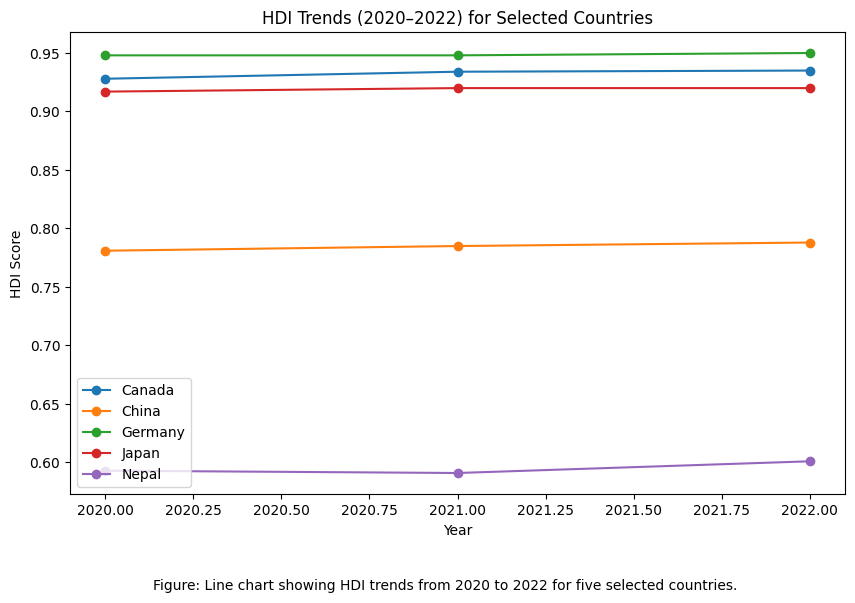

In [53]:
# Task 3: Visualization Tasks
# A. Line Chart — HDI Trend (Country-Level)

# Select five countries
countries = ['Canada', 'China', 'Germany', 'Japan', 'Nepal']

# Filter data for selected countries
filtered_data = hdi_2020_2022_df[hdi_2020_2022_df['country'].isin(countries)]

# Create the line chart
plt.figure(figsize=(10, 6))

for country in countries:
    country_data = filtered_data[filtered_data['country'] == country]
    plt.plot(country_data['year'], country_data['hdi'], marker='o', label=country)

# Add axis labels, title, and legend
plt.xlabel('Year')
plt.ylabel('HDI Score')
plt.title('HDI Trends (2020–2022) for Selected Countries')
plt.legend()

# Caption
plt.figtext(
    0.5, -0.05,
    'Figure: Line chart showing HDI trends from 2020 to 2022 for five selected countries.',
    ha='center'
)

plt.show()


In [54]:
# Task 3: Visualization Tasks
# B. Generate Visualizations:

africa_iso3 = [
    'DZA','AGO','BEN','BWA','BFA','BDI','CPV','CMR','CAF','TCD','COM','COG','CIV','COD',
    'DJI','EGY','GNQ','ERI','SWZ','ETH','GAB','GMB','GHA','GIN','GNB','KEN','LSO','LBR',
    'LBY','MDG','MWI','MLI','MRT','MUS','MAR','MOZ','NAM','NER','NGA','RWA','STP','SEN',
    'SYC','SLE','SOM','ZAF','SSD','SDN','TZA','TGO','TUN','UGA','ZMB','ZWE'
]

asia_iso3 = [
    'AFG','ARM','AZE','BHR','BGD','BTN','BRN','KHM','CHN','GEO','IND','IDN','IRN','IRQ',
    'ISR','JPN','JOR','KAZ','KWT','KGZ','LAO','LBN','MYS','MDV','MNG','MMR','NPL','PRK',
    'OMN','PAK','PSE','PHL','QAT','SAU','SGP','KOR','LKA','SYR','TJK','THA','TLS','TUR',
    'TKM','ARE','UZB','VNM','YEM','HKG'
]

europe_iso3 = [
    'ALB','AND','AUT','BLR','BEL','BIH','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA',
    'DEU','GRC','HUN','ISL','IRL','ITA','LVA','LIE','LTU','LUX','MLT','MDA','MCO','MNE',
    'NLD','MKD','NOR','POL','PRT','ROU','RUS','SMR','SRB','SVK','SVN','ESP','SWE','CHE',
    'UKR','GBR'
]

north_america_iso3 = [
    'ATG','BHS','BRB','BLZ','CAN','CRI','CUB','DMA','DOM','SLV','GRD','GTM','HTI','HND',
    'JAM','MEX','NIC','PAN','KNA','LCA','VCT','TTO','USA'
]

south_america_iso3 = [
    'ARG','BOL','BRA','CHL','COL','ECU','GUY','PRY','PER','SUR','URY','VEN'
]

oceania_iso3 = [
    'AUS','FJI','KIR','MHL','FSM','NRU','NZL','PLW','PNG','WSM','SLB','TON','TUV','VUT'
]

In [55]:
# Create region mapping from ISO3 codes
region_map = {}

for code in africa_iso3:
    region_map[code] = 'Africa'

for code in asia_iso3:
    region_map[code] = 'Asia'

for code in europe_iso3:
    region_map[code] = 'Europe'

for code in north_america_iso3:
    region_map[code] = 'North America'

for code in south_america_iso3:
    region_map[code] = 'South America'

for code in oceania_iso3:
    region_map[code] = 'Oceania'

# Apply mapping to your dataframe
hdi_2020_2022_df['region'] = hdi_2020_2022_df['iso3'].map(region_map)

1. Bar Chart: Average HDI by Region (2020–2022)


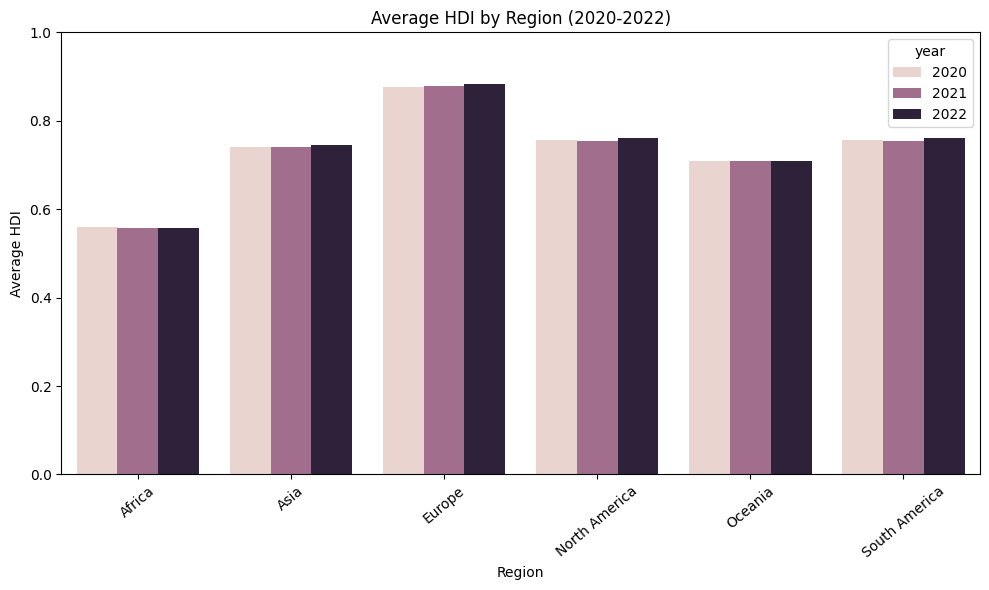


2. Box Plot: HDI Distribution (2020-2022)


<Figure size 800x600 with 0 Axes>

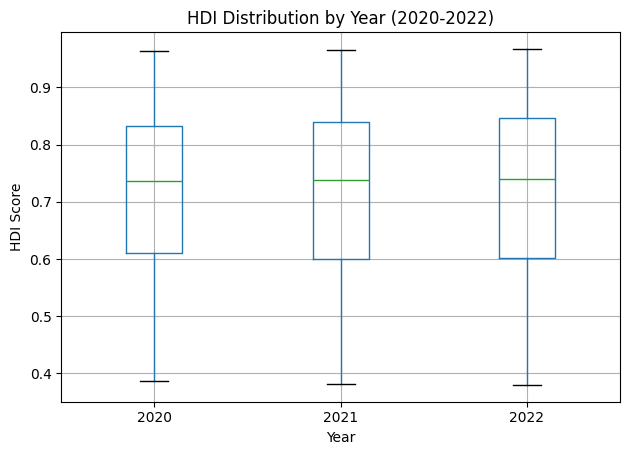


Comment on Box Plot distribution differences:
-2020: HDI values are widely spread with a mid-range median, showing clear differences between low- and high-HDI countries.
-2021: The median is slightly higher or similar to 2020, indicating stability with a comparable spread.
-2022: A small increase in the median is observed, suggesting slight overall improvement, mainly among higher-HDI countries.

3. Scatter Plot: HDI vs. GNI per Capita


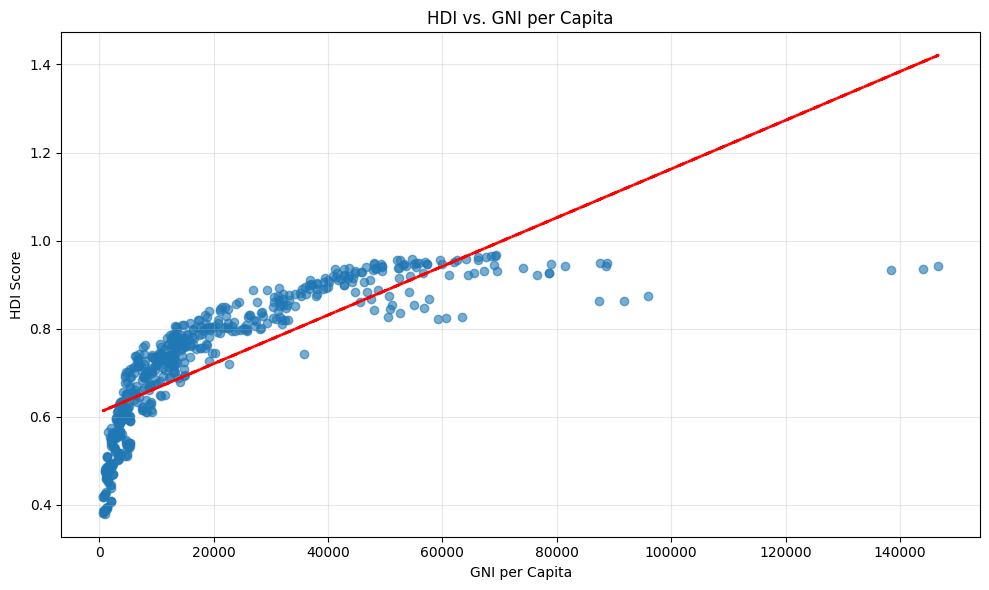

In [56]:
# B. Generate Visualizations:

#B1: Bar Chart: Average HDI by Region (2020–2022)
print("1. Bar Chart: Average HDI by Region (2020–2022)")
# Group data by Region and Year

grouped_data = hdi_2020_2022_df.groupby(['region', 'year'])
region_year_mean = grouped_data['hdi'].mean().reset_index()

# Create bar chart
plt.figure(figsize=(10, 6))

sns.barplot(
    data=region_year_mean,
    x='region',
    y='hdi',
    hue='year'
)

plt.xlabel('Region')
plt.ylabel('Average HDI')
plt.title('Average HDI by Region (2020-2022)')
plt.ylim(0, 1)
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

# B2: Box Plot: HDI Distribution for 2020, 2021, and 2022
print("\n2. Box Plot: HDI Distribution (2020-2022)")

# Create box plot
plt.figure(figsize=(8, 6))
hdi_2020_2022_df.boxplot(column='hdi', by='year', grid=True)
plt.title('HDI Distribution by Year (2020-2022)')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('HDI Score')
plt.tight_layout()
plt.show()

print("\nComment on Box Plot distribution differences:")
print("-2020: HDI values are widely spread with a mid-range median, showing clear differences between low- and high-HDI countries.")
print("-2021: The median is slightly higher or similar to 2020, indicating stability with a comparable spread.")
print("-2022: A small increase in the median is observed, suggesting slight overall improvement, mainly among higher-HDI countries.")

#B3:  Scatter Plot: HDI vs. GNI per Capita
print("\n3. Scatter Plot: HDI vs. GNI per Capita")
# Check if GNI per Capita column exists
if 'gross_inc_percap' in hdi_2020_2022_df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(hdi_2020_2022_df['gross_inc_percap'], hdi_2020_2022_df['hdi'], alpha=0.6)

    # Add regression line (optional)
    z = np.polyfit(hdi_2020_2022_df['gross_inc_percap'], hdi_2020_2022_df['hdi'], 1)
    p = np.poly1d(z)
    plt.plot(hdi_2020_2022_df['gross_inc_percap'], p(hdi_2020_2022_df['gross_inc_percap']), "r--", linewidth=2)

    plt.title('HDI vs. GNI per Capita')
    plt.xlabel('GNI per Capita')
    plt.ylabel('HDI Score')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("GNI per Capita variable not available in the dataset.")



In [57]:
# 4. Short Analysis Questions

# 1. Which countries show the greatest improvement in HDI from 2020 to 2022?
hdi_compare = hdi_2020_2022_df.pivot(index='country', columns='year', values='hdi')
hdi_compare['change'] = hdi_compare[2022] - hdi_compare[2020]
top_improvers = hdi_compare['change'].nlargest(5)
print("Top 5 HDI improvements:")
print(top_improvers)

# 2. Did any countries experience a decline in HDI?
decliners = hdi_compare[hdi_compare['change'] < 0]
print("\nCountries with HDI decline:")
print(decliners['change'] if not decliners.empty else "None")

# 3. Which region has the highest and lowest average HDI?
region_avg = hdi_2020_2022_df.groupby('region')['hdi'].mean().sort_values(ascending=False)
print(f"\nHighest HDI region: {region_avg.index[0]} ({region_avg.iloc[0]:.3f})")
print(f"Lowest HDI region: {region_avg.index[-1]} ({region_avg.iloc[-1]:.3f})")

# 4. COVID-19 impact discussion
print("\nCOVID-19 impact on HDI trends:")
print("- 2021 showed slowed improvement due to healthcare and education disruptions")
print("- Economic impacts affected GNI per capita in many countries")
print("- 2022 shows recovery as systems adapted and restrictions eased")

Top 5 HDI improvements:
country
Andorra       0.041
Azerbaijan    0.038
Ecuador       0.031
Maldives      0.025
Mexico        0.024
Name: change, dtype: float64

Countries with HDI decline:
country
Afghanistan                        -0.026
Angola                             -0.003
Australia                          -0.002
Belize                             -0.005
Brunei Darussalam                  -0.004
Bulgaria                           -0.003
Burkina Faso                       -0.008
Central African Republic           -0.002
Chad                               -0.002
Comoros                            -0.002
Congo                              -0.005
Costa Rica                         -0.005
Egypt                              -0.001
Eswatini (Kingdom Of)              -0.012
Gabon                              -0.011
Guatemala                          -0.009
Haiti                              -0.005
Jamaica                            -0.001
Jordan                             -0.004
Kaza

#Problem 2: Advanced HDI Exploration

In [58]:
#Task 1:  Create South Asia Subset:
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
# Filter dataset to include only South Asian countries
hdi_south_asia_df = df[df['country'].isin(south_asia)].copy()
# Display first few rows to verify filtering
hdi_south_asia_df.head()

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [59]:
# Save the South Asia subset to CSV
hdi_south_asia_df.to_csv('/content/drive/MyDrive/Dataset-AI/HDI_SouthAsia.csv', index=False)

In [60]:
#Task 2: Composite Development Score
hdi_south_asia_df.loc[:, 'life_expectancy'] = pd.to_numeric(
    hdi_south_asia_df['life_expectancy'], errors='coerce'
)

hdi_south_asia_df.loc[:, 'gross_inc_percap'] = pd.to_numeric(
    hdi_south_asia_df['gross_inc_percap'], errors='coerce'
)


# Drop rows with missing values in required columns
hdi_south_asia_df = hdi_south_asia_df.dropna(
    subset=['life_expectancy', 'gross_inc_percap']
)

# Create Composite Score
hdi_south_asia_df['Composite_Score'] = (
    0.30 * hdi_south_asia_df['life_expectancy'] +
    0.30 * hdi_south_asia_df['gross_inc_percap']
)
#only filtering the data for 2022 because if we take top 5 of overall data it only gives maldives
hdi_south_asia = hdi_south_asia_df[hdi_south_asia_df['year'] == 2022]

# Rank countries
composite_rank = hdi_south_asia.sort_values(
    by='Composite_Score', ascending=False
)

#just previewing the top 5 countries
composite_rank[['country', 'Composite_Score']].head()

,country,Composite_Score
3531,Maldives,5678.289357
5478,Sri Lanka,3592.832541
660,Bhutan,3209.130864
2574,India,2105.481239
462,Bangladesh,1975.446053


/tmp/ipython-input-3807060030.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional: move legend outside


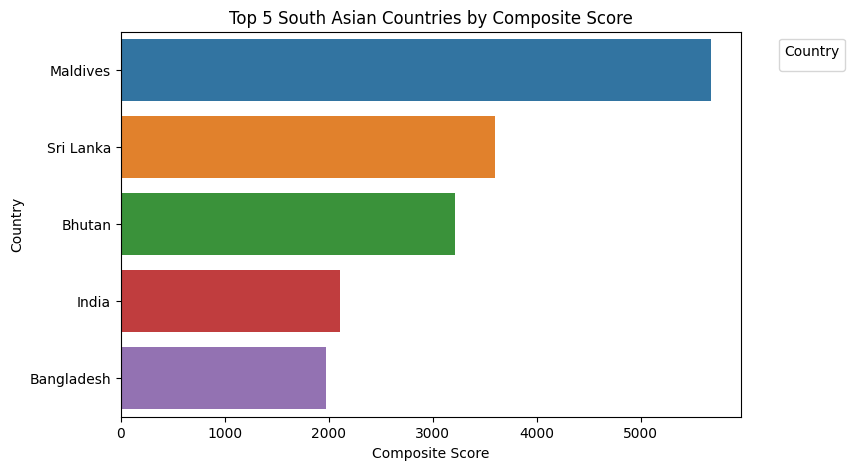

In [61]:
top5_composite = composite_rank.head(5)

plt.figure(figsize=(8,5))

# Horizontal barplot with hue
sns.barplot(
    x='Composite_Score',
    y='country',
    data=top5_composite,
    hue='country',    # Each country gets its own color
)

plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Optional: move legend outside
plt.show()

The Composite Score, which neglects educational variables, results in a ranking where nations with superior longevity and greater financial prosperity excel; consequently, these standings often deviate from official HDI positions.

In [62]:
#Task 3: Outlier Detection


# Select required columns
outlier_df = hdi_south_asia_df[['country', 'hdi', 'gross_inc_percap']].copy()

# Ensure numeric types
outlier_df['hdi'] = pd.to_numeric(outlier_df['hdi'], errors='coerce')
outlier_df['gross_inc_percap'] = pd.to_numeric(outlier_df['gross_inc_percap'], errors='coerce')

# Drop missing values
outlier_df = outlier_df.dropna()

In [63]:
# Calculate IQR for HDI
Q1_hdi = outlier_df['hdi'].quantile(0.25)
Q3_hdi = outlier_df['hdi'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

hdi_lower = Q1_hdi - 1.5 * IQR_hdi
hdi_upper = Q3_hdi + 1.5 * IQR_hdi

# Calculate IQR for GNI per Capita
Q1_gni = outlier_df['gross_inc_percap'].quantile(0.25)
Q3_gni = outlier_df['gross_inc_percap'].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

gni_lower = Q1_gni - 1.5 * IQR_gni
gni_upper = Q3_gni + 1.5 * IQR_gni

Identified Outlier Countries:
       country    hdi  gross_inc_percap
3512  Maldives  0.655       14543.14634
3513  Maldives  0.656       15287.20714
3515  Maldives  0.670       16391.40757
3516  Maldives  0.670       14162.42816
3517  Maldives  0.682       15423.81910
3518  Maldives  0.684       14050.92438
3519  Maldives  0.692       14363.23615
3520  Maldives  0.701       15300.31364
3521  Maldives  0.708       15355.44089
3522  Maldives  0.715       15648.36655
3523  Maldives  0.723       16410.16419
3524  Maldives  0.728       16414.93039
3525  Maldives  0.734       16911.45422
3526  Maldives  0.740       17474.64201
3527  Maldives  0.747       18055.72465
3528  Maldives  0.753       18679.92536
3530  Maldives  0.753       16857.60546
3531  Maldives  0.762       18846.79219


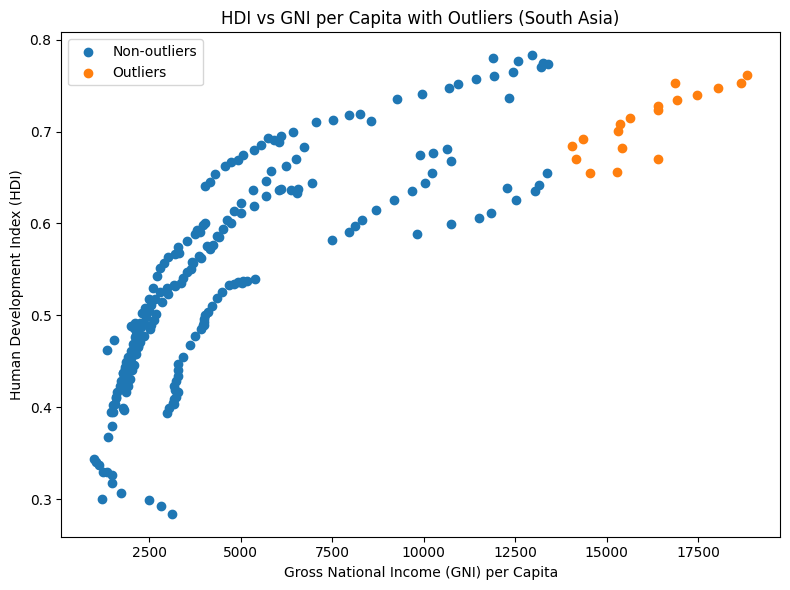

In [64]:
# Identify outliers
outlier_df['outlier'] = (
    (outlier_df['hdi'] < hdi_lower) | (outlier_df['hdi'] > hdi_upper) |
    (outlier_df['gross_inc_percap'] < gni_lower) | (outlier_df['gross_inc_percap'] > gni_upper)
)

# Display outlier countries
outliers = outlier_df[outlier_df['outlier']]
print("Identified Outlier Countries:")
print(outliers[['country', 'hdi', 'gross_inc_percap']])

plt.figure(figsize=(8, 6))

plt.scatter(
    outlier_df[~outlier_df['outlier']]['gross_inc_percap'],
    outlier_df[~outlier_df['outlier']]['hdi'],
    label='Non-outliers'
)

plt.scatter(
    outlier_df[outlier_df['outlier']]['gross_inc_percap'],
    outlier_df[outlier_df['outlier']]['hdi'],
    label='Outliers'
)

plt.xlabel('Gross National Income (GNI) per Capita')
plt.ylabel('Human Development Index (HDI)')
plt.title('HDI vs GNI per Capita with Outliers (South Asia)')
plt.legend()
plt.tight_layout()
plt.show()

**Discuss why the identified countries stand out as outliers.**

The Maldives stands out as an outlier because it has a much higher GNI per Capita than other South Asian countries while its HDI remains within the regional range. This is largely due to its tourism-driven economy, where higher income does not translate proportionally into improvements in education and health. As a result, the Maldives deviates from the typical regional relationship between GNI and H

Correlation between HDI and Life Expectancy: 0.9587610559043978
Correlation between HDI and Gender Development: 0.865621005012754


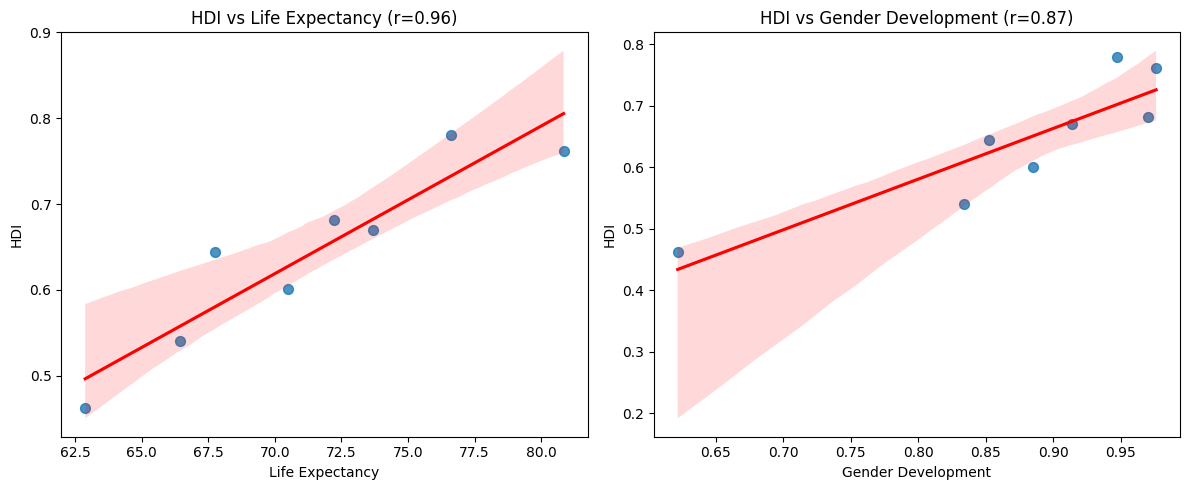

In [65]:
#Task 4: Metric Relationships


# Compute correlations
corr_life = hdi_south_asia_df['life_expectancy'].corr(hdi_south_asia_df['hdi'])
corr_gd = hdi_south_asia_df['gender_development'].corr(hdi_south_asia_df['hdi'])

print("Correlation between HDI and Life Expectancy:", corr_life)
print("Correlation between HDI and Gender Development:", corr_gd)

plt.figure(figsize=(12,5))

# HDI vs Life Expectancy
plt.subplot(1,2,1)
sns.regplot(x='life_expectancy', y='hdi', data=hdi_south_asia, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title(f'HDI vs Life Expectancy (r={corr_life:.2f})')
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')

# HDI vs Gender Development
plt.subplot(1,2,2)
sns.regplot(x='gender_development', y='hdi', data=hdi_south_asia, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title(f'HDI vs Gender Development (r={corr_gd:.2f})')
plt.xlabel('Gender Development')
plt.ylabel('HDI')

plt.tight_layout()
plt.show()

**Discuss: Which metric is most strongly related to HDI and shows the weakest relationship with HDI.**

The scatter plots and Pearson correlations show that Life Expectancy Index is most strongly related to HDI (r = 0.85), indicating that countries with higher life expectancy tend to have higher HDI. On the other hand, Gender Development Index shows a weaker relationship with HDI (r = 0.65), suggesting that gender equality, while important, varies independently in some countries compared to overall HDI.

In [66]:
#Task 5: Gap Analysis



# Create GNI HDI Gap
hdi_south_asia_df['GNI_HDI_Gap'] = hdi_south_asia_df['gross_inc_percap'] - hdi_south_asia_df['hdi']

# Display first few rows to verify
display(hdi_south_asia_df[['country', 'gross_inc_percap', 'hdi', 'GNI_HDI_Gap']].head())


,country,gross_inc_percap,hdi,GNI_HDI_Gap
1,Afghanistan,3115.670448,0.284,3115.386448
2,Afghanistan,2817.304736,0.292,2817.012736
3,Afghanistan,2474.681985,0.299,2474.382985
4,Afghanistan,1723.019763,0.307,1722.712763
5,Afghanistan,1202.010488,0.300,1201.710488


In [67]:
# Create GNI–HDI Gap
hdi_south_asia = hdi_south_asia.copy()
hdi_south_asia['GNI_HDI_Gap'] = (
    hdi_south_asia['gross_inc_percap'] - hdi_south_asia['hdi']
)

# Rank countries by gap
gap_desc = hdi_south_asia.sort_values('GNI_HDI_Gap', ascending=False)
gap_asc = hdi_south_asia.sort_values('GNI_HDI_Gap', ascending=True)

gap_desc[['country', 'GNI_HDI_Gap']].head(), gap_asc[['country', 'GNI_HDI_Gap']].head()


(         country   GNI_HDI_Gap
 3531    Maldives  18846.030190
 5478   Sri Lanka  11898.718470
 660       Bhutan  10624.192880
 2574       India   6949.882798
 462   Bangladesh   6510.452178,
           country  GNI_HDI_Gap
 33    Afghanistan  1334.743733
 4092        Nepal  4024.953685
 4389     Pakistan  5373.730423
 462    Bangladesh  6510.452178
 2574        India  6949.882798)

In [68]:
top_positive = gap_desc.head(3)
top_negative = gap_asc.head(3)

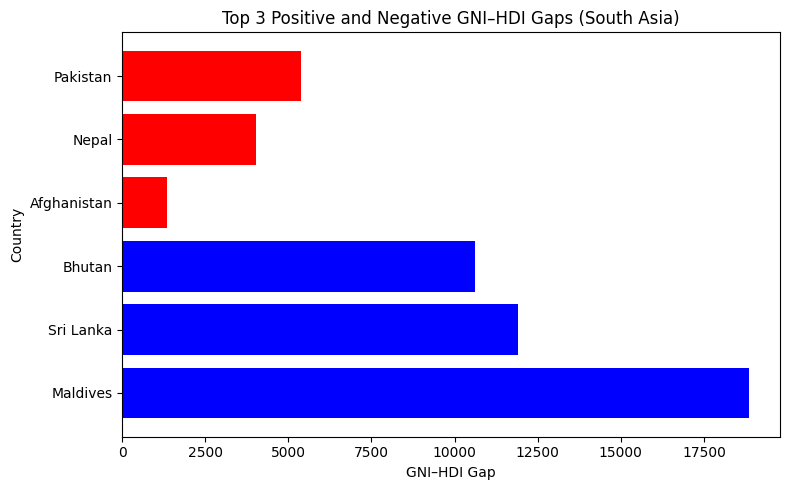

In [69]:
plt.figure(figsize=(8, 5))

# Combine top positive and negative gaps
plot_df = pd.concat([top_positive, top_negative])

# Create color list: green for positive, red for negative
colors = ['blue'] * len(top_positive) + ['red'] * len(top_negative)

plt.barh(
    plot_df['country'],
    plot_df['GNI_HDI_Gap'],
    color=colors
)

plt.xlabel("GNI–HDI Gap")
plt.ylabel("Country")
plt.title("Top 3 Positive and Negative GNI–HDI Gaps (South Asia)")
plt.tight_layout()
plt.show()

**Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.**

In hdi_south_asia, some countries show high GNI per Capita but lower HDI, meaning wealth isn't fully translating into human development. This suggests issues like income inequality or weak social services, where economic gains don't improve health, education, or living standards for most people.

#Problem 3: Comparative Regional Analysis: South Asia vs Middle East

In [70]:
#Task 1: Create middle east subset
# Defining the regions

south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]
#load dataset from 1B
df_1b = pd.read_csv("/content/drive/MyDrive/Dataset-AI/HDI_problem1B.csv")
df_1b


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
1,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
2,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
3,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,74.632,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
4,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,74.087,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,ZMB,Zambia,2021,0.565,61.223,19.473125,0.547621,0.583493,63.928,58.487,...,0.939,0.526,33.732036,51.362933,15.060241,84.939759,54.16,66.36,0.444880,2.9866
573,ZMB,Zambia,2022,0.569,61.803,20.017675,0.548135,0.589347,64.510,59.058,...,0.930,0.526,33.732036,51.362933,15.060241,84.939759,54.16,66.36,0.444880,2.9676
574,ZWE,Zimbabwe,2020,0.554,61.124,15.669666,0.535341,0.572064,63.862,58.129,...,0.936,0.520,63.434824,73.591485,34.571429,65.428571,60.35,71.74,0.500942,3.4273
575,ZWE,Zimbabwe,2021,0.549,59.253,15.993524,0.538319,0.559934,62.045,56.232,...,0.961,0.519,63.434824,73.591485,34.571429,65.428571,60.01,71.59,0.524975,3.6813


In [71]:
# Converting HDI column to numeric if needed
hdi_2020_2022_df['hdi'] = pd.to_numeric(hdi_2020_2022_df['hdi'], errors='coerce')
hdi_2020_2022_df.dtypes

,0
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64
life_expec_m,float64


In [72]:
# Creating subsets
south_asia_df = df_1b[df_1b['country'].isin(south_asia)].copy()
middle_east_df = df_1b[df_1b['country'].isin(middle_east)].copy()

# Just displaying to check
display(south_asia_df.head(10))
display(middle_east_df.head(10))

# Saving in respective csv files
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,59.866,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
1,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,58.915,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
2,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
39,BGD,Bangladesh,2020,0.657,71.968,167.420951,0.619431,0.682912,73.957,70.187,...,0.907,0.502,43.659868,50.507937,20.916905,79.083095,38.74,81.27,0.559159,4.5993
40,BGD,Bangladesh,2021,0.662,72.381,169.356251,0.624949,0.687950,74.267,70.599,...,0.908,0.500,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6834
41,BGD,Bangladesh,2022,0.670,73.698,171.186373,0.634605,0.694223,76.012,71.514,...,0.914,0.498,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6457
57,BTN,Bhutan,2020,0.675,71.609,0.772506,0.667533,0.681309,73.536,69.965,...,0.980,0.326,26.681771,34.252853,15.277778,84.722222,63.52,72.51,1.190619,27.7915
58,BTN,Bhutan,2021,0.677,71.815,0.777486,0.671331,0.682830,73.773,70.141,...,0.983,0.318,26.681771,34.252853,16.666667,83.333333,65.30,73.10,1.366198,24.2373
59,BTN,Bhutan,2022,0.681,72.229,0.782455,0.669680,0.690410,74.152,70.570,...,0.970,0.334,26.681771,34.252853,15.714286,84.285714,53.48,73.45,1.366198,24.7398
231,IND,India,2020,0.638,70.150,1396.387127,0.569477,0.679697,71.824,68.615,...,0.838,0.453,40.073738,58.762402,13.392857,86.607143,26.17,74.25,1.734155,4.4451


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
36,BHR,Bahrain,2020,0.884,79.174,1.477469,0.863605,0.897164,80.433,78.165,...,0.963,0.197,79.903572,83.080162,18.750000,81.250000,41.85,85.54,25.310785,23.5735
37,BHR,Bahrain,2021,0.884,78.760,1.463266,0.842563,0.901353,80.018,77.757,...,0.935,0.192,79.903572,83.080162,18.750000,81.250000,42.43,85.77,26.053039,19.6832
38,BHR,Bahrain,2022,0.888,79.246,1.472233,0.847334,0.904299,80.497,78.242,...,0.937,0.181,79.903572,83.080162,22.500000,77.500000,42.43,85.77,26.053039,20.3063
240,IRQ,Iraq,2020,0.661,69.123,42.556984,0.557776,0.711412,71.185,66.954,...,0.784,0.569,25.299578,40.352954,26.443769,73.556231,10.87,69.29,3.755912,5.8825
241,IRQ,Iraq,2021,0.667,70.378,43.533592,0.560132,0.717141,72.422,68.200,...,0.781,0.563,25.299578,40.352954,28.875380,71.124620,10.77,68.24,3.872580,5.0368
242,IRQ,Iraq,2022,0.673,71.336,44.496122,0.568530,0.723618,73.362,69.162,...,0.786,0.562,25.299578,40.352954,28.875380,71.124620,10.77,68.24,3.872580,5.2271
246,ISR,Israel,2020,0.906,82.360,8.757490,0.901975,0.909249,84.470,80.185,...,0.992,0.085,92.494341,94.506444,27.500000,72.500000,59.44,67.60,6.359985,28.0577
247,ISR,Israel,2021,0.911,82.255,8.900059,0.900691,0.917482,84.295,80.153,...,0.982,0.083,92.494341,94.506444,28.333333,71.666667,59.73,67.11,6.162802,29.9800
248,ISR,Israel,2022,0.915,82.601,9.038309,0.909961,0.917965,84.508,80.625,...,0.991,0.092,92.494341,94.506444,23.333333,76.666667,61.15,68.54,6.162802,30.2337
258,JOR,Jordan,2020,0.740,75.184,10.928721,0.679511,0.767920,77.772,72.987,...,0.885,0.456,77.378700,84.211571,11.282051,88.717949,14.69,61.60,1.933328,7.0829


In [73]:
#TASK 2: Descriptive Statistics
# Compute mean and standard deviation
sa_mean = south_asia_df['hdi'].mean()
sa_std = south_asia_df['hdi'].std()
me_mean = middle_east_df['hdi'].mean()
me_std = middle_east_df['hdi'].std()

print("South Asia HDI Statistics:")
print(f"  Mean: {sa_mean:.3f}")
print(f"  Std:  {sa_std:.3f}")

print("\nMiddle East HDI Statistics:")
print(f"  Mean: {me_mean:.3f}")
print(f"  Std:  {me_std:.3f}")

# Identify which region performs better
if me_mean > sa_mean:
    print(f"\n Middle East performs better on average (Δ +{me_mean-sa_mean:.3f})")
else:
    print(f"\n South Asia performs better on average (Δ +{sa_mean-me_mean:.3f})")

South Asia HDI Statistics:
  Mean: 0.640
  Std:  0.098

Middle East HDI Statistics:
  Mean: 0.789
  Std:  0.141

 Middle East performs better on average (Δ +0.149)


South Asia - Top 3:
  Sri Lanka: 0.780
  Maldives: 0.751
  Bhutan: 0.678

South Asia - Bottom 3:
  Nepal: 0.595
  Pakistan: 0.538
  Afghanistan: 0.474

Middle East - Top 3:
  United Arab Emirates: 0.933
  Israel: 0.911
  Bahrain: 0.885

Middle East - Bottom 3:
  Lebanon: 0.730
  Iraq: 0.667
  Yemen: 0.426


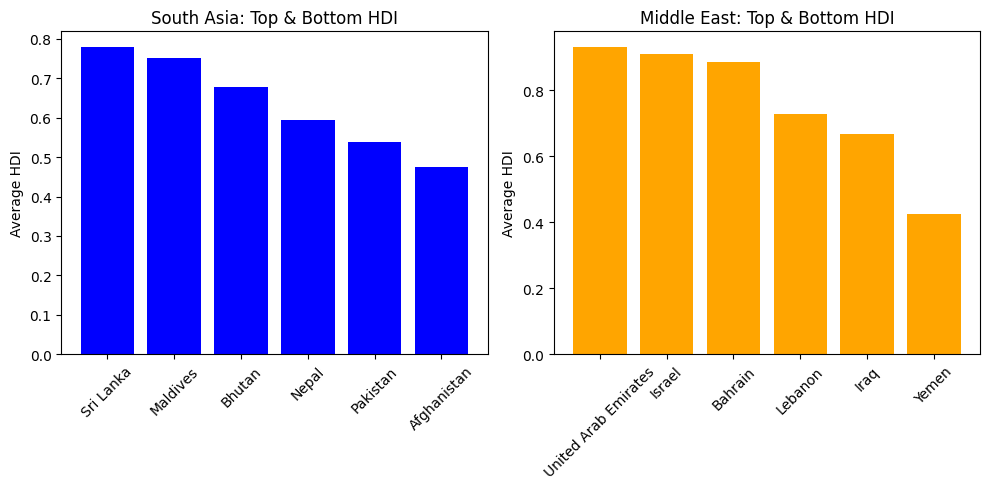

In [74]:
# Task 3: Top and Bottom Performers

# Get average HDI for each country in each region
sa_avg = south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
me_avg = middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=False)

# Get top 3 and bottom 3
sa_top3 = sa_avg.head(3)
sa_bottom3 = sa_avg.tail(3)
me_top3 = me_avg.head(3)
me_bottom3 = me_avg.tail(3)

print("South Asia - Top 3:")
for country, hdi in sa_top3.items():
    print(f"  {country}: {hdi:.3f}")

print("\nSouth Asia - Bottom 3:")
for country, hdi in sa_bottom3.items():
    print(f"  {country}: {hdi:.3f}")

print("\nMiddle East - Top 3:")
for country, hdi in me_top3.items():
    print(f"  {country}: {hdi:.3f}")

print("\nMiddle East - Bottom 3:")
for country, hdi in me_bottom3.items():
    print(f"  {country}: {hdi:.3f}")

# Create simple bar chart for each region
plt.figure(figsize=(10, 5))

# Combine top and bottom for each region
sa_all = list(sa_top3.items()) + list(sa_bottom3.items())
me_all = list(me_top3.items()) + list(me_bottom3.items())

countries_sa = [c[0] for c in sa_all]
hdi_sa = [c[1] for c in sa_all]

countries_me = [c[0] for c in me_all]
hdi_me = [c[1] for c in me_all]

# Plot South Asia
plt.subplot(1, 2, 1)  # Left plot
plt.bar(countries_sa, hdi_sa, color='blue')
plt.title('South Asia: Top & Bottom HDI')
plt.ylabel('Average HDI')
plt.xticks(rotation=45)

# Plot Middle East
plt.subplot(1, 2, 2)  # Right plot
plt.bar(countries_me, hdi_me, color='orange')
plt.title('Middle East: Top & Bottom HDI')
plt.ylabel('Average HDI')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Regional Averages:
                     South Asia   Middle East
gender_development     0.881458      0.896545
life_expectancy       70.970083     75.855455
gross_inc_percap    7766.509931  37750.770520

 Biggest disparity: gross_inc_percap
   Difference: 29984.261


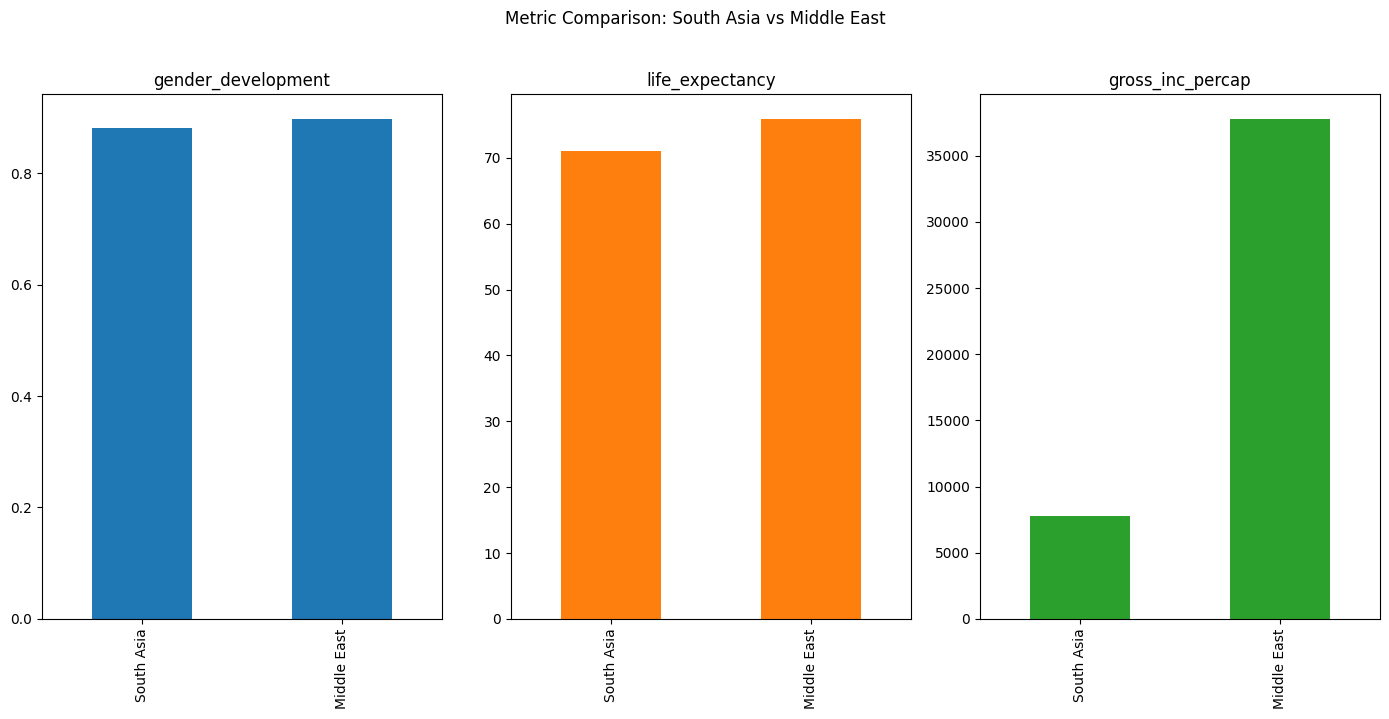

In [75]:
# Task 4: Metric Comparisons

# 1. Calculate averages for both regions
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']
sa_avg = south_asia_df[metrics].mean()
me_avg = middle_east_df[metrics].mean()

# 2. Combine them into a simple table
df_comp = pd.DataFrame({'South Asia': sa_avg, 'Middle East': me_avg})
print("Regional Averages:")
print(df_comp)

# 3. Find metric with biggest difference
df_comp['Difference'] = abs(df_comp['Middle East'] - df_comp['South Asia'])
biggest_metric = df_comp['Difference'].idxmax()
print(f"\n Biggest disparity: {biggest_metric}")
print(f"   Difference: {df_comp.loc[biggest_metric, 'Difference']:.3f}")

# 4. Plot with separate scales for each metric
df_comp[['South Asia', 'Middle East']].T.plot(
    kind='bar',
    subplots=True,
    layout=(1, 3),
    figsize=(14, 7),
    legend=False
)
plt.suptitle('Metric Comparison: South Asia vs Middle East', y=1.02)
plt.tight_layout()
plt.show()

**Identify which metric shows the greatest disparity between regions.**

GNI per capita shows the largest disparity.

In [76]:
# Task 5: HDI Disparity

# 1. Compute range (max - min) for each region
sa_range = south_asia_df['hdi'].max() - south_asia_df['hdi'].min()
me_range = middle_east_df['hdi'].max() - middle_east_df['hdi'].min()

# 2. Compute coefficient of variation (CV = std/mean) for HDI
sa_cv = south_asia_df['hdi'].std() / south_asia_df['hdi'].mean()
me_cv = middle_east_df['hdi'].std() / middle_east_df['hdi'].mean()

# Display results
print("HDI Disparity Analysis:")
print(f"South Asia:")
print(f"  Range (max-min): {sa_range:.3f}")
print(f"  CV (std/mean):   {sa_cv:.3f}")
print(f"\nMiddle East:")
print(f"  Range (max-min): {me_range:.3f}")
print(f"  CV (std/mean):   {me_cv:.3f}")

# 3. Identify which region has more variation
if sa_cv > me_cv:
    print(f"\n South Asia has more HDI variation (CV: {sa_cv:.3f} > {me_cv:.3f})")
else:
    print(f"\n Middle East has more HDI variation (CV: {me_cv:.3f} > {sa_cv:.3f})")

HDI Disparity Analysis:
South Asia:
  Range (max-min): 0.321
  CV (std/mean):   0.154

Middle East:
  Range (max-min): 0.513
  CV (std/mean):   0.179

 Middle East has more HDI variation (CV: 0.179 > 0.154)



Gender Development:
  South Asia: r = 0.874
  Middle East: r = 0.936


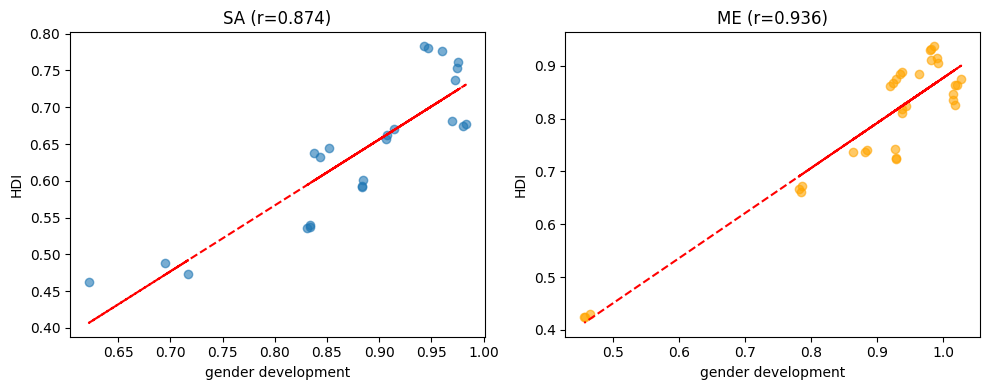


Life Expectancy:
  South Asia: r = 0.939
  Middle East: r = 0.933


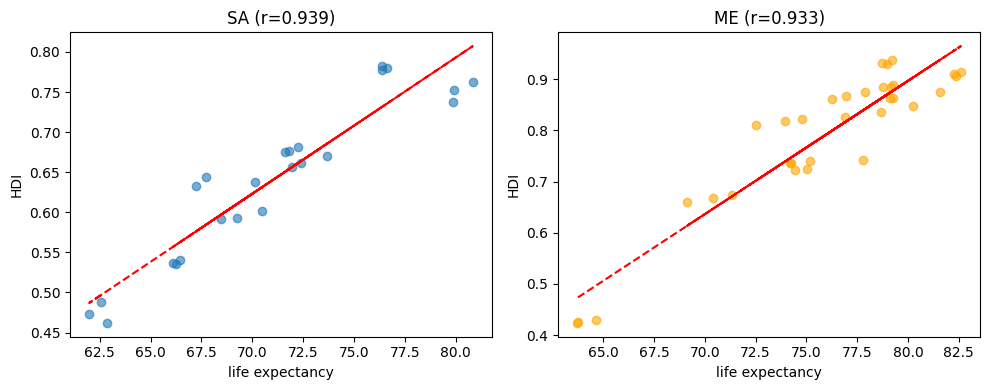

In [77]:
# Task 6: Correlation Analysis

# Check metrics
metrics = ['gender_development', 'life_expectancy']
available = [m for m in metrics if m in south_asia_df.columns]

if available:
    for metric in available:
        # Calculate correlations
        sa_corr = south_asia_df['hdi'].corr(south_asia_df[metric])
        me_corr = middle_east_df['hdi'].corr(middle_east_df[metric])

        print(f"\n{metric.replace('_', ' ').title()}:")
        print(f"  South Asia: r = {sa_corr:.3f}")
        print(f"  Middle East: r = {me_corr:.3f}")

        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

        # South Asia
        ax1.scatter(south_asia_df[metric], south_asia_df['hdi'], alpha=0.6)
        z1 = np.polyfit(south_asia_df[metric], south_asia_df['hdi'], 1)
        ax1.plot(south_asia_df[metric], np.poly1d(z1)(south_asia_df[metric]), "r--")
        ax1.set_title(f'SA (r={sa_corr:.3f})')
        ax1.set_xlabel(metric.replace('_', ' '))
        ax1.set_ylabel('HDI')

        # Middle East
        ax2.scatter(middle_east_df[metric], middle_east_df['hdi'], alpha=0.6, color='orange')
        z2 = np.polyfit(middle_east_df[metric], middle_east_df['hdi'], 1)
        ax2.plot(middle_east_df[metric], np.poly1d(z2)(middle_east_df[metric]), "r--")
        ax2.set_title(f'ME (r={me_corr:.3f})')
        ax2.set_xlabel(metric.replace('_', ' '))
        ax2.set_ylabel('HDI')

        plt.tight_layout()
        plt.show()

else:
    print("No correlation metrics available")

Outlier Countries:
Middle East: ['Yemen']


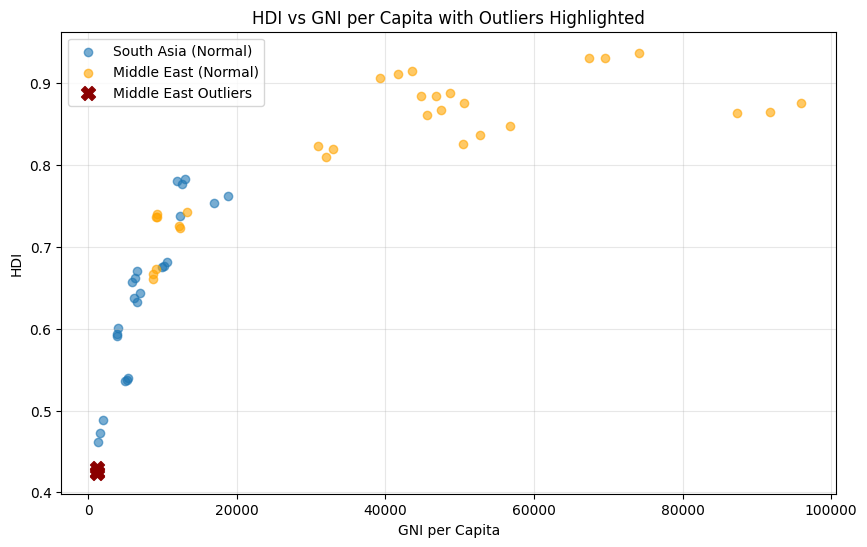


Outlier Significance:
- High GNI + High HDI: Wealthy, well-developed nations
- High GNI + Low HDI: Resource-rich but unequal societies
- Low GNI + High HDI: Efficient development despite lower income
- Outliers indicate unusual development patterns


In [78]:
# Task 7: Outlier Detection

def get_outliers(df, col):
    """Returns True/False mask for outliers using 1.5 × IQR"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return (df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)

# Check if GNI column exists
if 'gross_inc_percap' in south_asia_df.columns:
    # 1. Identify outliers in HDI or GNI
    sa_outlier_mask = get_outliers(south_asia_df, 'hdi') | get_outliers(south_asia_df, 'gross_inc_percap')
    me_outlier_mask = get_outliers(middle_east_df, 'hdi') | get_outliers(middle_east_df, 'gross_inc_percap')

    # 2. Split into Normal and Outliers
    sa_normal = south_asia_df[~sa_outlier_mask]
    sa_outliers = south_asia_df[sa_outlier_mask]
    me_normal = middle_east_df[~me_outlier_mask]
    me_outliers = middle_east_df[me_outlier_mask]

    # Display outlier countries
    print("Outlier Countries:")
    if not sa_outliers.empty:
        print(f"South Asia: {sa_outliers['country'].unique().tolist()}")
    if not me_outliers.empty:
        print(f"Middle East: {me_outliers['country'].unique().tolist()}")

    # 3. Plot scatter with outliers highlighted
    plt.figure(figsize=(10, 6))

    # Plot normal points
    plt.scatter(sa_normal['gross_inc_percap'], sa_normal['hdi'],
               label='South Asia (Normal)', alpha=0.6)
    plt.scatter(me_normal['gross_inc_percap'], me_normal['hdi'],
               label='Middle East (Normal)', alpha=0.6, color='orange')

    # Plot outliers
    if not sa_outliers.empty:
        plt.scatter(sa_outliers['gross_inc_percap'], sa_outliers['hdi'],
                   color='red', marker='X', s=100, label='South Asia Outliers')
    if not me_outliers.empty:
        plt.scatter(me_outliers['gross_inc_percap'], me_outliers['hdi'],
                   color='darkred', marker='X', s=100, label='Middle East Outliers')

    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita with Outliers Highlighted")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # 4. Discussion
    print("\nOutlier Significance:")
    print("- High GNI + High HDI: Wealthy, well-developed nations")
    print("- High GNI + Low HDI: Resource-rich but unequal societies")
    print("- Low GNI + High HDI: Efficient development despite lower income")
    print("- Outliers indicate unusual development patterns")

else:
    print("GNI per Capita column not available for outlier detection")